In [2]:
### Работа с датасетом "Титаник"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.ticker as mticker

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

df = pd.read_csv(r"C:\Users\ASUS\Downloads\Telegram Desktop\Titanic.csv")

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Определение колонок
PassengerId - int - Уникальный идентификатор пассажира

Survived - int (0/1) - Факт выживания

Pclass - int (1–3) - Класс билета

Name - str - Полное имя пассажира

Sex - str - Пол пассажира

Age - float - Возраст пассажира

SibSp - int - Количество детей одних родителей (сиблингов)

Parch - int - Кол-во родителей или детей на борту

Ticket - str - Номер билета

Fare - float - Стоимость билета (в фунтах стерлингов)

Cabin - str - Номер каютыEmbarked - str - Порт посадки

In [4]:
df["Age"] = df.groupby(["Sex", "Pclass"])["Age"].transform(lambda x: x.fillna(x.median()))
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

### Работа с пропусками
Cabin - не используется, пропусти не заполнялись

Age - медиана по полу и классу

Embarked - всего два пропуска, поэтому заполнен по самому популярному

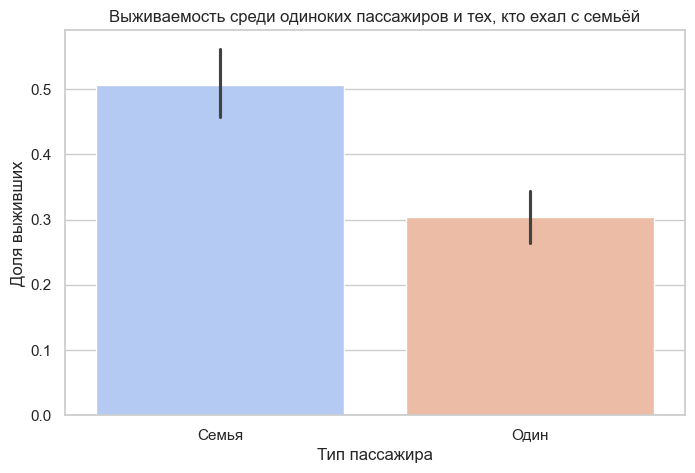

In [5]:
# Гипотеза 1: Пассажиры, ехавшие не в одиночку, выживали чаще
# Добавим новый столбец FamilySize
df["FamilySize"] = df["SibSp"] + df["Parch"]

# Создадим категорию "Одинокий" или "Семья"
df["IsAlone"] = df["FamilySize"].apply(lambda x: "Один" if x == 0 else "Семья")

# Визуализация
sns.barplot(data=df, x="IsAlone", y="Survived", hue="IsAlone", palette="coolwarm", legend=False)
plt.title("Выживаемость среди одиноких пассажиров и тех, кто ехал с семьёй")
plt.ylabel("Доля выживших")
plt.xlabel("Тип пассажира")
plt.show()


Вывод: Гиптоеза подтвердилась

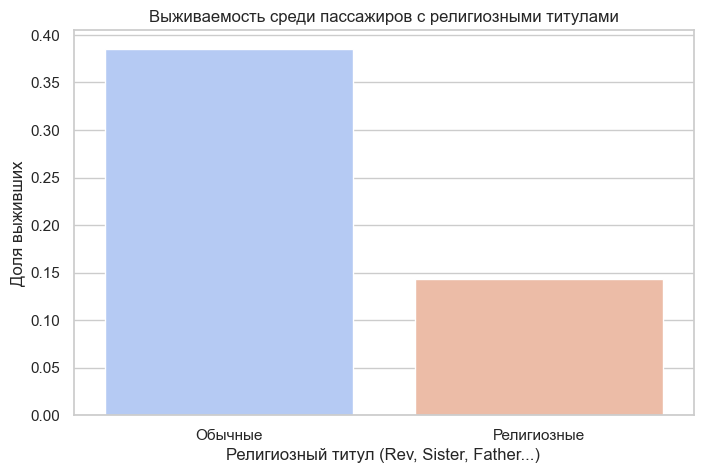

In [6]:
# Гипотеза 2: религиозными титулами выживали реже — возможно, потому что помогали другим или оставались на корабле до конца

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем данные
df = pd.read_csv(r"C:\Users\ASUS\Downloads\Telegram Desktop\Titanic.csv")

# Создаём признак "религиозный титул"
df["IsReligious"] = df["Name"].str.contains("Rev|Father|Sister|Pastor|Monsignor", case=False, na=False)

# Группируем и считаем среднюю выживаемость
survival_rates = df.groupby("IsReligious", as_index=False)["Survived"].mean()

# Визуализация
sns.barplot(
    data=survival_rates,
    x="IsReligious",
    y="Survived",
    hue="IsReligious",
    palette="coolwarm",
    legend=False
)

plt.title("Выживаемость среди пассажиров с религиозными титулами")
plt.xlabel("Религиозный титул (Rev, Sister, Father...)")
plt.ylabel("Доля выживших")
plt.xticks([0, 1], ["Обычные", "Религиозные"])
plt.show()



Вывод: Гипотеза подтвердилась. Вероятно это связано с самопожертвованием как добродетелью в католицизме

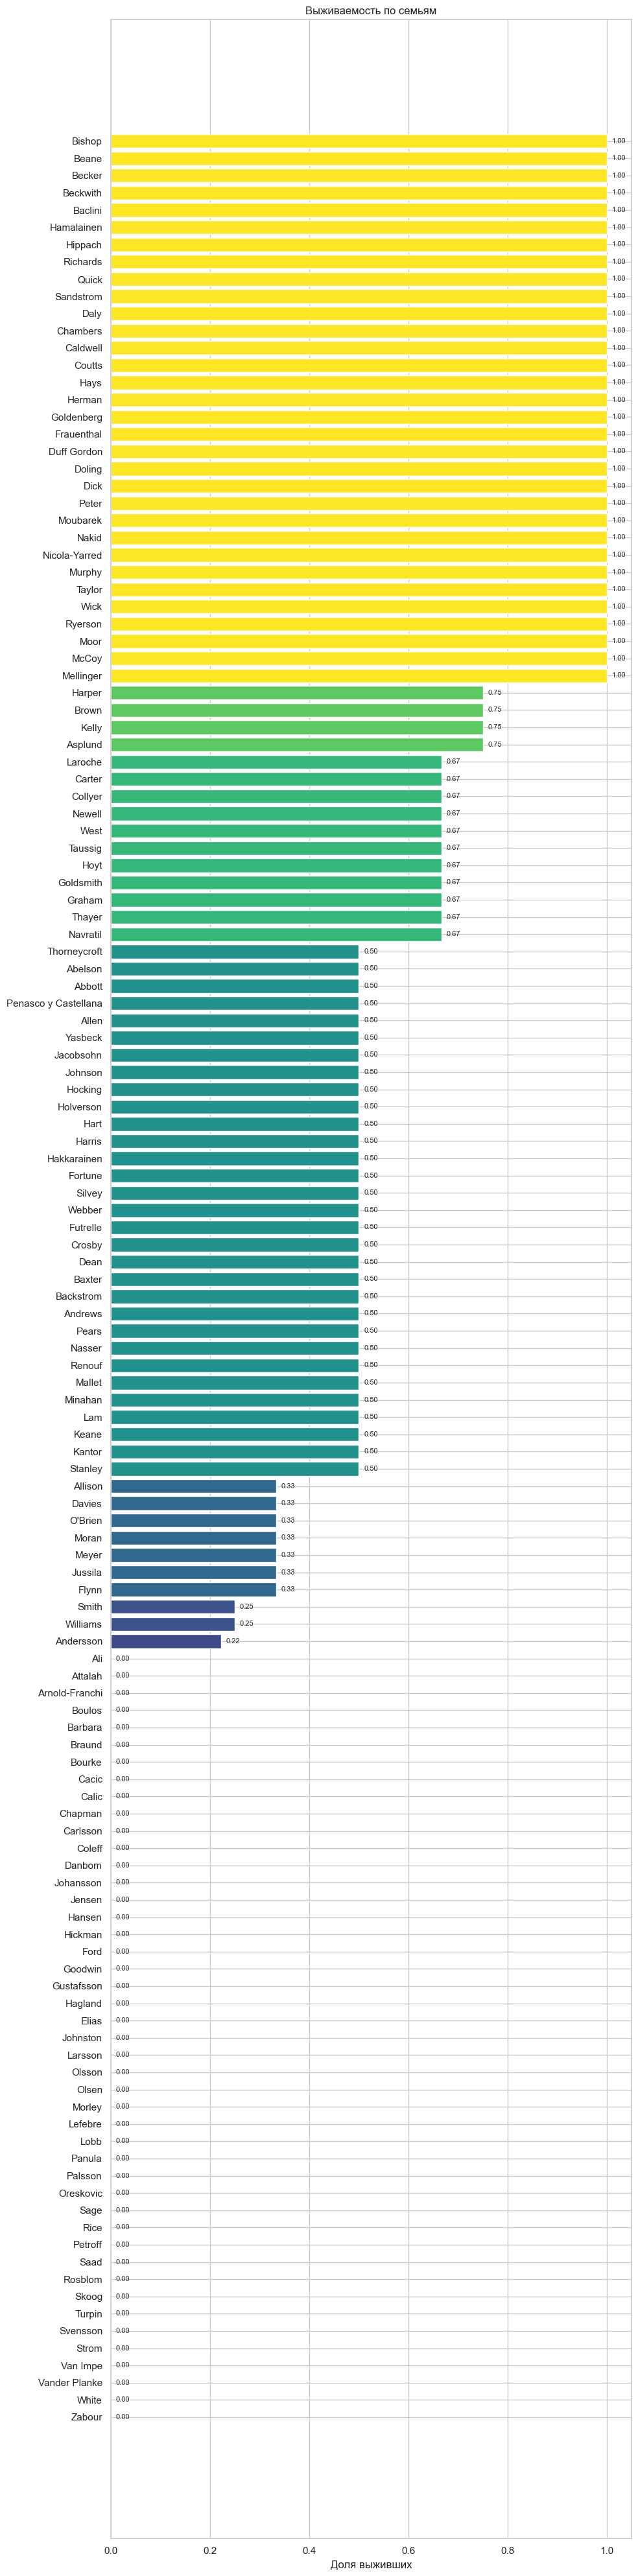

In [7]:
# Гипотеза 4: Члены одной семьи (по фамилии) имели схожие шансы выжить
import matplotlib.colors as mcolors
# 1. Получаем фамилии и считаем выживаемость
df["LastName"] = df["Name"].apply(lambda x: x.split(",")[0])
family_stats = (
    df.groupby("LastName")["Survived"]
      .agg(FamilyCount="count", SurvivalRate="mean")
      .reset_index()
)

# 2. Фильтруем только семьи (2+ человека)
families = family_stats[family_stats["FamilyCount"] >= 2]

# 3. Сортируем по выживаемости (чтобы было логично)
families = families.sort_values("SurvivalRate", ascending=False)

# 4. Строим большой горизонтальный график
fig, ax = plt.subplots(figsize=(10, len(families) * 0.3)) 
norm = mcolors.Normalize(vmin=0, vmax=1)
colors = plt.cm.viridis(norm(families["SurvivalRate"]))

ax.barh(families["LastName"], families["SurvivalRate"], color=colors)
ax.invert_yaxis()
ax.set_xlabel("Доля выживших")
ax.set_title("Выживаемость по семьям")

# Подписи процентов
for i, v in enumerate(families["SurvivalRate"]):
    ax.text(v + 0.01, i, f"{v:.2f}", va="center", fontsize=8)

plt.tight_layout()
plt.show()


Вывод: Можно сказать, что в болшинтсве случаев члены одной семьи выживаи с одинаковой вероятностью. Гипотеза подтвердилась

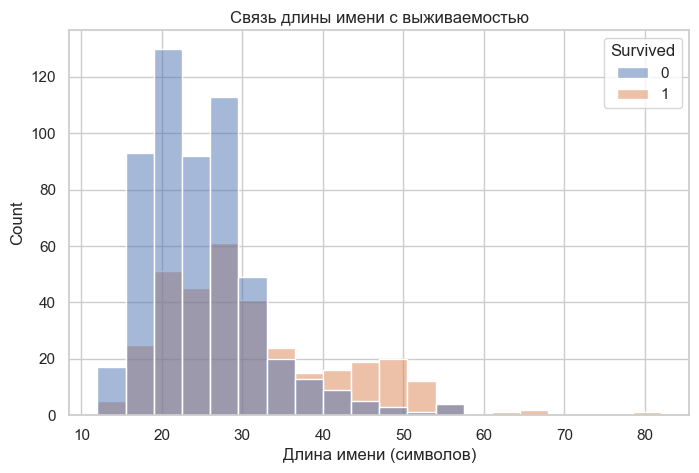

In [8]:
# Гипотеза 4: Пассажиры с длинными именами выживали чаще
df["NameLength"] = df["Name"].apply(len)
sns.histplot(data=df, x="NameLength", hue="Survived", bins=20)
plt.title("Связь длины имени с выживаемостью")
plt.xlabel("Длина имени (символов)")
plt.show()


In [ ]:
Вывод: Можно сказать, что все же выживаемость у людей с длинными именами выше, но их меньше, вероятно это связано с тем, что длинные имена встречались чаще среди людец со "статусом" 

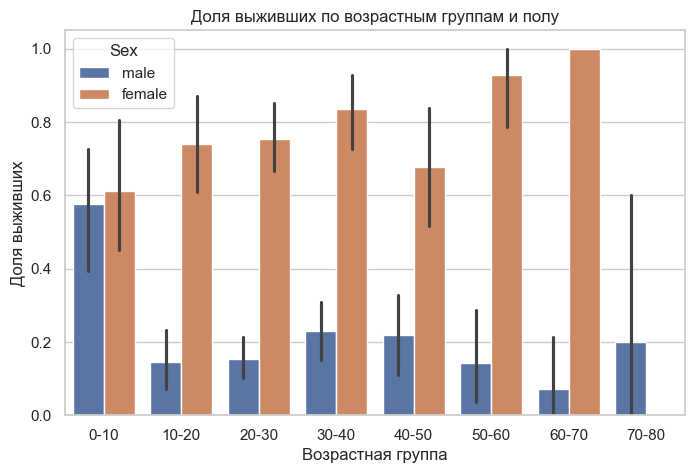

In [9]:
# Гипотеза 5: Старики выживали чаще молодых людей.
df["AgeGroup"] = pd.cut(df["Age"], bins=[0,10,20,30,40,50,60,70,80], labels=["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80"])

sns.barplot(data=df, x="AgeGroup", y="Survived", hue="Sex")
plt.title("Доля выживших по возрастным группам и полу")
plt.xlabel("Возрастная группа")
plt.ylabel("Доля выживших")
plt.show()



Вывод: можно сказать, что частично гипотеза оправдалась. Для женщин увелечинение возраста действитлеьно карелирует с выживаемостью, но для мужчин - нет

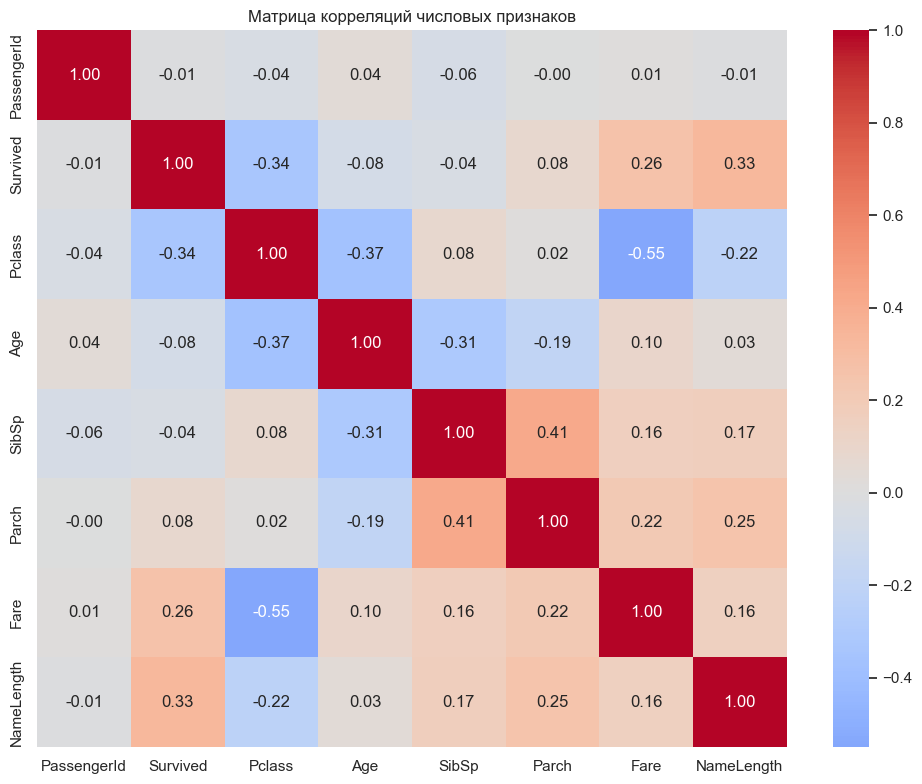

Матрица корреляций:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   
NameLength     -0.012986  0.332350 -0.220001  0.034612  0.165019  0.252282   

                 Fare  NameLength  
PassengerId  0.012658   -0.012986  
Survived     0.257307    0.332350  
Pclass      -0.549500   -0.220001  
Age          0.096067    0.034612  
SibSp        0.159651    0.165019  
Parch        0.216225    0.252282  
Fare         1.000000    

In [10]:
# Матрица корреляций
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Матрица корреляций числовых признаков')
plt.tight_layout()
plt.show()

print("Матрица корреляций:")
print(correlation_matrix)